In [2]:
import numpy as np #load library first always
import scipy.linalg as la #for eigenvalues
import matplotlib.pyplot as plt #to be able to plot 
from numpy import genfromtxt #import data
import pandas as pd  #for finding max and min values, confusion matrix

In [3]:
#######################################
#
# Importing Data
# I added 'import from numpy genfromtxt'.  
# I made found mnist_test and mnist_train on https://github.com/pjreddie/mnist-csv-png. 
#
#######################################


my_test_data = genfromtxt('/Users/vickyhaney/Desktop/mnist_test.csv', delimiter=',') 
#sizetest = len(my_test_data)
#print(my_test_dat.shape)
my_train_data = genfromtxt('/Users/vickyhaney/Desktop/mnist_train.csv', delimiter=',') 
#sizetrain = len(my_train_data) #takes a long time
#print(size)

In [3]:
print(my_test_data.shape)
print(my_train_data.shape)

(10000, 785)
(60000, 785)


In [3]:
#let 'index' be the 1x10000 vector from 
#my_test_data which represents my 0-9 integers
##################################
#
#  index labels for training data
#
##################################

index_train = my_train_data[:,0:1]
print(index_train.shape)
index_train = index_train.astype(int)  #convert to int from float



#let 'index' be the 1x10000 vector from 
#my_test_data which represents my 0-9 integers
##################################
#
#  index labels for test data
#
##################################

index_test = my_test_data[:,0:1]
print(index_test.shape)
index_test = index_test.astype(int)  #convert to int from float



(60000, 1)
(10000, 1)


In [7]:
##################################
#
#  Features_Training table placing bias 
#  in first row instead of integers
#
##################################
#Let F(features) equal the 60000 X 784 features scaled 
#by 255 and replace the 1st column with 1s

f_train = my_train_data/255
f_train[:,0] = np.ones((60000,)) #making the first row all 1s 
print(f_train.shape)    #correct size :) 60000 x785 columns

F_train = np.transpose(f_train)    #785 x 600000
print(F_train.shape)

#print(F_train)

##################################
#
#  Features_test data table placing bias in first row instead of integers
#
##################################
#Let F(features) equal the 10000 X 784 features scaled by 255 and replace the 1st column with 1s
f_test = my_test_data/255
f_test[:,0] = np.ones((10000,)) #making the first row all 1 
print(f_test.shape)    #correct size :) 10000 x785 columns

F_test = np.transpose(f_test)   #785 x 10000
#print(F_test.shape)
#print(F_test)

(60000, 785)
(785, 60000)
(10000, 785)


In [9]:
###############################
#
# This is my Truth_train matrix. I used my index_train from above. 
#  It will never change. 
# 1-hot encoded
# https://www.kite.com/python/answers/how-to-do-one-hot-encoding-with-numpy-in-python
#
###############################



print(index_train.shape)

shape = (np.transpose(index_train).size, np.transpose(index_train).max()+1)            
                                                
t_train = np.zeros(shape)                    #creates a matrix of zero with shape I need
rows = np.arange(np.transpose(index_train).size)
t_train[rows, np.transpose(index_train)] = 1

#print(t_train.shape)
T_train = np.transpose(t_train)
#print(T_train)
#print(T_train.shape)


###############################
#
# This is my Truth_test matrix. I used my index_test from above. 
# It will never change. 
# 1-hot encoded
# #https://www.kite.com/python/answers/how-to-do-one-hot-encoding-with-numpy-in-python
#
###############################


print(index_test.shape)

shape1 = (np.transpose(index_test).size, np.transpose(index_test).max()+1)            
                                                
t_test = np.zeros(shape1)                     #creates a matrix of zero with shape I need
rows1 = np.arange(np.transpose(index_test).size)
t_test[rows1, np.transpose(index_test)] = 1

#print(t_train.shape)
T_test = np.transpose(t_test)
#print(T_test)
#print(T_test.shape)

(60000, 1)
(10, 60000)
(10000, 1)
(10, 10000)


In [10]:
###################################
#
# Thresholded my Target matrix to 0.9's and 0.1's
# due to Sigmoid function
#
##################################

def threshold(T):
    #T[T >= 1] = 0.9   different way of doing this
    #T[T < 1] = 0.1    different way of doing this
    T = np.where(T == 1, 0.9, T)         
    T = np.where(T <= 0, 0.1, T)
    return T



In [11]:
###################################
#
# These are more non-changing Target_train
# and Target_test matrices of 0.9's and 0.1's
# due to Sigmoid function
#
##################################

T_train = threshold(T_train)
#print(T_train)
print(T_train.shape)
#print(np.min(T_train))
#print(np.max(T_train))


T_test = threshold(T_test)
#print(T_test)
print(T_test.shape)
#print(np.min(T_test))
#print(np.max(T_test))

(10, 60000)
(10, 10000)


In [12]:
#####################
#
# Initializing my weights for 
# input to hidden: w_hidden \in (n) x 78
#
# len(F_Train) is size of features (785) including bias
# Write a command to create a random matrix of size 4x4 whose elements are 
# uniformly distributed in the interval (a,b), 
# (b - a) * np.random.random_sample((m, n)) + a
#
######################
n = 100 # Hidden Nodes: 20, 50,100


w_hidden = (0.05-(-0.05)) * np.random.random_sample((n, len(F_train))) + (-0.05)
print(w_hidden.shape)

(100, 785)


In [13]:
#####################
#
# Initializing my weights for 
# hidden to output: w_output \in (10) x (n+1) (bias on hidden node)
#
# Write a command to create a random matrix of size 4x4 whose elements are 
# uniformly distributed in the interval (a,b), 
# (b - a) * np.random.random_sample((m, n)) + a
#
######################

#take into account hidden node bias

w_outer = (0.05-(-0.05)) * np.random.random_sample((10,n+1)) + (-0.05)
print(w_outer.shape)

(10, 101)


In [14]:
#################################
#
#initialize previous delta_weigths as zeros
#
##################################
previous_d_hidden = np.zeros((n,785))
previous_d_outer = np.zeros((10,n+1)) 

In [15]:
#####################################
#
# This is my activation function for my hidden layer
# takes our feature matrix multiplied
# by my weight matrix, then activitates 
# using our sigmoid function sigma=1/(1+e^(-x))
#
######################################



def activation(A,B):
    y = np.dot(A, B)  
    return y


# define sigmoid function 

def sigmoid(y):
    s = 1/(1 + np.exp(-y))
    return(s)


#############################################
#
# Big Delta weight updates for Backward phase
# since we only have one output here, 
# S_k, k= outer
# S_j, j =hidden
#
###############################################

def Output_weight_updates(o, T): #o will need to be indexed for more than 1 output
    delta_outer = o * (1 - o) * (T - o)
    return delta_outer

def Hidden_weight_updates(h,w,d):   #this will be w_outer
    delta_hidden = h * (1 - h) * (activation(w,d))   
    return delta_hidden


#########################################
#
# This is my delta weights function used for 
# delta hidden and delta outer
#
#########################################

eta = 0.1
alpha = 0.9

def delta_weights(eta,alpha,d,h,p):   #eta,alpha(momentum),h = hidden_array, d= D_outer/D_hidden, p=previous weight
    delta_w = (eta * np.outer(d , h)) + (alpha * p)
    return delta_w

In [16]:
#########################################
#
# This is my accuracy function 
#
#########################################

def accuracy(w_h,w_o,F,T,m):                          #(w_hidden,w_outer,F_train,T_train,60000)
    Z = np.zeros((1, m))
    for column in range(len(F[0])):                  # for column in range(len(F_train[0])) 
        Y = activation(w_h,F[:,column:column+1])     # Y = activation(w_hidden,F_train) 
        H = sigmoid(Y)                               # 20 x 1
        H = np.append(1, H)                          #add bias but makes it a row
        H = np.reshape(H, (n+1,1)) #reshape to column vector and for some reason it loses the dimension 1    
        X = activation(w_o,H)      # becoming 1x2
        O_array = sigmoid(X)                #output array will stay 1x2
        Z[:,column:column+1] = O_array.argmax() - T[:,column:column+1].argmax()  #Outputs_predicted - T   # Y - trut    
    r = np.nonzero(np.any(Z != 0, axis=0))[0]     #find all columns that are nonzero
    c = len(r)                                    #find all columns that are nonzero
    Acc = 1 - c/m                                 # 1 - number of nonzero columns/size of samples
    return Acc

In [17]:
#################################################
#
# NEURAL NETWORK ALGORITHM
# Depending on which experiment, 
# plug in F_train[:,i:i+1], F_train_half[:,i:i+1]), F_train_quarter[:,i:i+1])
# T_train[:,i:i+1], T_train_half[:,i:i+1]), T_train_quarter[:,i:i+1])
# where indicated
#
##################################################


epo = 50 #50

eta = 0.1
alpha = 0.9  #0, 0.25, 0.5

###########################
#For accuracy: initialize O_node_array and H_node_array
###########################
accuracy_training = np.zeros(epo) #number of epochs
accuracy_test = np.zeros(epo) #number of epochs


for epoch in range(epo):
    print(epoch)
    idx = np.random.permutation(60000)  #60000, 30000, 15000 
    for i in idx:

################################
#
# Making hidden_arrays
# Begin Forward prop
#
################################

        y = activation(w_hidden,F_train[:,i:i+1])   #F_train_quarter[:,i:i+1],  F_train_half[:,i:i+1])
        hidden = np.transpose(sigmoid(y))   #20x 1, no extra '1'
        hidden_array = np.append(1, hidden)
        hidden_array = np.reshape(hidden_array, (1, n+1)) #for some reason it loses the dimension 1

            
################################
#
# Creating output 
# using hidden array and w_outer
#
#################################    
    
        o_array = activation(w_outer,np.transpose(hidden_array))
        output_array = sigmoid(o_array)
        
################################
#
# Ends forward phase
# Begin Backprop
#            
#################################
    
################################
#
# Obtain Big Delta_outer_error
#
#################################
     
        D_outer_array = Output_weight_updates(output_array, T_train[:,i:i+1])   #T_train_quarter[:,i:i+1]) 
        
    
################################
#
# Obtain Big Delta_hidden_error
# needs Delta_outer to calc
#
#################################
        
        w_outer_del = np.delete(w_outer, 0, 1) #deleted first row that deals with h_0
        D_hidden = Hidden_weight_updates(np.transpose(hidden),np.transpose(w_outer_del),D_outer_array)
        #this provides a 21 x 1 vector.  I don't care about first one. it has to do with hidden_node bian

    
################################
#
# Delta weights from output to hidden
#
#################################
     
        d_w_outer = delta_weights(eta,alpha,D_outer_array,hidden_array,previous_d_outer)    
                 
        w_outer += d_w_outer #over write our w_outer, change to 
        previous_d_outer = d_w_outer

                        
################################
#
# Delta weights from hidden to outer
#
#################################  


        d_w_hidden = delta_weights(eta,alpha,D_hidden,F_train[:,i:i+1],previous_d_hidden)  #F_train_quarter[:,i:i+1] 

        w_hidden +=  d_w_hidden #over write our w_outer 
        previous_d_hidden = d_w_hidden #rewrite previous w_hidden                 

#######################################
#
# Accuracy functions
#
#######################################

    accuracy_training[epoch] = accuracy(w_hidden,w_outer,F_train,T_train,15000) #F_train_quarter, T_train_quarter, 30000, 60000

    accuracy_test[epoch] = accuracy(w_hidden,w_outer,F_test,T_test,10000)   #(w_hidden,w_outer,F_test,T_test,10000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [42]:
print(accuracy_training.shape)

(5,)


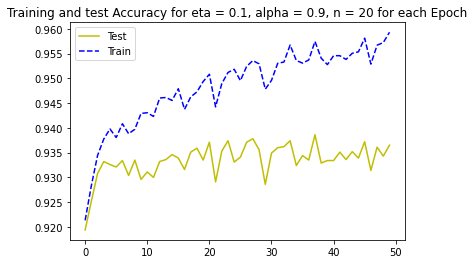

In [150]:
#######################################
#
# Plotting eta =0.1, alpha =0.9 for train and test data
# n =20 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0.9, n = 20 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, very close to matlab

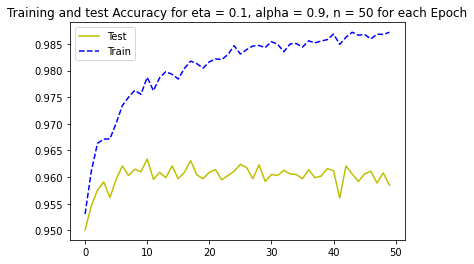

In [178]:
#######################################
#
# Plotting eta =0.1, alpha =0.9 for train and test data
# n =50 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0.9, n = 50 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, very close to matlab

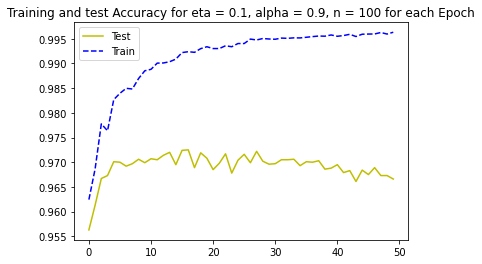

In [190]:
#######################################
#
# Plotting eta =0.1, alpha =0.9 for train and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0.9, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, very close to matlab

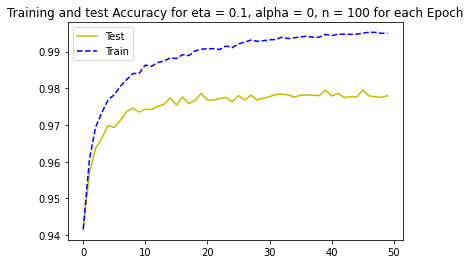

In [213]:
#######################################
#
# Plotting eta =0.1, alpha =0 for train and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, very close to matlab

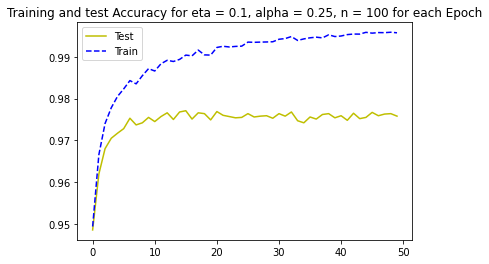

In [225]:
#######################################
#
# Plotting eta =0.1, alpha =0.25 for train and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0.25, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, 

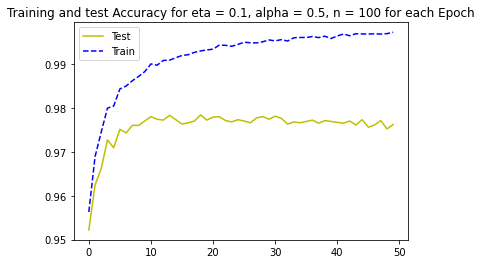

In [237]:
#######################################
#
# Plotting eta =0.1, alpha =0.5 for train and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('Training and test Accuracy for eta = 0.1, alpha = 0.5, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, 

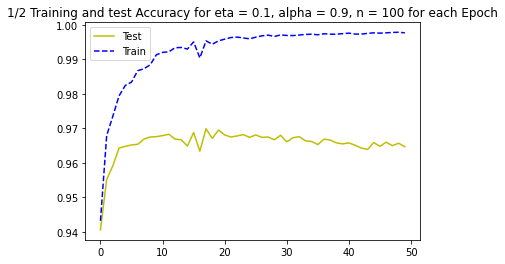

In [304]:
#######################################
#
# Plotting eta =0.1, alpha =0.9 for 1/2 train data and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('1/2 Training and test Accuracy for eta = 0.1, alpha = 0.9, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, 

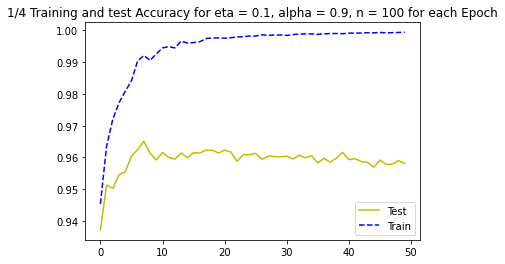

In [322]:
#######################################
#
# Plotting eta =0.1, alpha =0.9 for 1/4 train data and test data
# n =100 hidden layers, 50 epochs
#
########################################

x = np.arange(0, epo) 
y = accuracy_test 
z = accuracy_training
plt.plot(x,y,'y-')
plt.plot(x,z,'b--')
plt.title('1/4 Training and test Accuracy for eta = 0.1, alpha = 0.9, n = 100 for each Epoch')
plt.legend(['Test', 'Train']) #just need extra brackets, 